In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import astropy.units as u
from astropy.cosmology import Planck18, z_at_value

In [2]:
import matplotlib

font = {'family' : 'serif',
        'size'   : 16}

matplotlib.rc('font', **font)


In [4]:
# plotdir = 'mtot_q_grid_plots_xas_vs_d_snr/'
# plotdir = 'mtot_q_grid_plots_xas_vs_d_det/'

In [5]:
# mtots = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# # mtots = [7, 10, 12]


# Mc_files = []
# for mtot in mtots:
#     # Mc_files.append('mtot_q_grids_continuous/mtot_'+str(mtot)+'_Mc_grid_DL_1000.csv')
#     Mc_files.append('mtot_q_grids_xas_vs_d/mtot_'+str(mtot)+'_Mc_grid_SNR_100.0.csv')
# print(Mc_files)

# eta_files = []
# for mtot in mtots:
#     # eta_files.append('mtot_q_grids_continuous/mtot_'+str(mtot)+'_eta_grid_DL_1000.csv')
#     eta_files.append('mtot_q_grids_xas_vs_d/mtot_'+str(mtot)+'_eta_grid_SNR_100.0.csv')
# print(eta_files)



# df1 = pd.DataFrame()
# for fi in Mc_files:
#     df_temp = pd.read_csv(fi)
#     df1 = df1.append(df_temp)
# # drop the zero rows that resulted from NoneType Networks
# df1 = df1.loc[~(df1==0).all(axis=1)]

# df2 = pd.DataFrame()
# for fi in eta_files:
#     df_temp = pd.read_csv(fi)
#     df2 = df2.append(df_temp)
# # drop the zero rows that resulted from NoneType Networks
# df2 = df2.loc[~(df2==0).all(axis=1)]

In [6]:
# cols_to_use = df2.columns.difference(df1.columns)

# df = df1.copy()
# for col_to_use in cols_to_use:
#     df[col_to_use] = df2[col_to_use].values

    
# # df = pd.merge(df1, df2[cols_to_use], left_index=True, right_index=True, how='outer')

# df[::10]

In [7]:
df = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/snr_10.0_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0.csv')

df[::25]

,Mc,eta,m1,m2,M_tot,q,chi1z,chi2z,DL,z,...,Mc_stat_err,eta_stat_err,DL_stat_err,chi1z_stat_err,chi2z_stat_err,ra_stat_err,dec_stat_err,psi_stat_err,full_faith,full_inner_prod
0,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,-0.9990,-0.9990,8386.053404,1.186619,...,0.000203,0.002239,884.026896,0.045816,0.277417,0.049414,0.125925,0.204218,0.763520,0.307275
25,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,-0.5994,-0.3996,8501.015975,1.199794,...,0.000205,0.002309,890.993059,0.042360,0.280336,0.044535,0.114143,0.203888,0.992995,0.963924
50,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,-0.1998,0.1998,8613.626774,1.212668,...,0.000211,0.002448,897.624964,0.037197,0.281534,0.039973,0.102645,0.203911,0.983267,0.953393
75,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,0.1998,0.7992,8723.901748,1.225244,...,0.000225,0.002728,905.606394,0.029992,0.271935,0.035407,0.090702,0.204371,0.990353,0.970565
100,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,0.7992,-0.7992,8839.649909,1.238413,...,0.000253,0.003225,911.461075,0.009085,0.206007,0.030001,0.076018,0.205233,0.951805,0.577000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11975,43.073509,0.245669,56.581008,43.418992,100.0,1.303140,0.9990,0.3996,102127.572877,9.677596,...,0.118193,0.106319,11024.975843,3.389762,3.379515,0.049379,0.129494,0.198740,0.997898,0.501338
12000,43.526869,0.249994,50.251256,49.748744,100.0,1.010101,-0.7992,0.9990,93301.972749,8.938849,...,0.148038,0.000295,13847.164395,10.386457,10.297035,0.050892,0.132741,0.195576,0.999107,0.685295
12025,43.526869,0.249994,50.251256,49.748744,100.0,1.010101,-0.1998,-0.5994,87028.262240,8.410180,...,0.174775,0.002149,12486.713135,44.802299,44.904511,0.053532,0.138426,0.196395,0.999722,0.675919
12050,43.526869,0.249994,50.251256,49.748744,100.0,1.010101,0.1998,0.0000,94075.129888,9.003790,...,0.150383,0.010674,14025.426804,94.075548,94.217718,0.051179,0.133387,0.196256,0.984943,0.662550


In [8]:
# drop the zero rows that resulted from NoneType Networks
# df = df.loc[~(df==0).all(axis=1)]
df = df[df["Mc"] > 0]

# df = df[df["q"] < 7]

# # Compute redshifts based on Planck18 cosmology
# zs = np.zeros(len(df["DL"]))
# for i, dl in enumerate(df["DL"]):
#     zs[i] = z_at_value(Planck18.luminosity_distance, dl * u.Mpc)

# Compute m1, m2 for plots
# mass1 = (df["q"]**(2./5.))*((1.0 + df["q"])**(1./5.))*df["Mc"]
# mass2 = (df["q"]**(-3./5.))*((1.0 + df["q"])**(1./5.))*df["Mc"]


print("Total number of events:",len(df))

# Separate data into unbiased and unfaithful
# Mc_unbiased_mask = np.abs(df["Mc_full_bias"])/df["Mc_stat_err"] < 1.0
# eta_unbiased_mask = np.abs(df["eta_full_bias"])/df["eta_stat_err"] < 1.0

# faith_mask = np.abs(df["full_faith"]) > (df["Mc_min_faith"])

# print("Total number of events:",len(df))
# print("Total number of events with unbiased Mc:", np.sum(Mc_unbiased_mask))
# print("Total number of events with faithfulness above calculated threshold:", np.sum(faith_mask))
# print("Overlap between bias and faithfulness criteria:", len(df[Mc_unbiased_mask*faith_mask]))

df[::10]

Total number of events: 12100


,Mc,eta,m1,m2,M_tot,q,chi1z,chi2z,DL,z,...,Mc_stat_err,eta_stat_err,DL_stat_err,chi1z_stat_err,chi2z_stat_err,ra_stat_err,dec_stat_err,psi_stat_err,full_faith,full_inner_prod
0,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,-0.9990,-0.9990,8386.053404,1.186619,...,0.000203,0.002239,884.026896,0.045816,0.277417,0.049414,0.125925,0.204218,0.763520,0.307275
10,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,-0.9990,0.9990,8421.002299,1.190628,...,0.000206,0.002278,886.126290,0.051762,0.295742,0.047920,0.122438,0.204208,0.873307,0.857874
20,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,-0.7992,0.7992,8469.949029,1.196237,...,0.000206,0.002310,888.679909,0.048650,0.294050,0.045851,0.117411,0.204045,0.967772,0.928506
30,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,-0.5994,0.5994,8518.331173,1.201776,...,0.000207,0.002347,891.620689,0.045203,0.291692,0.043852,0.112476,0.203939,0.988305,0.978531
40,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,-0.3996,0.3996,8566.211815,1.207251,...,0.000209,0.002392,894.897554,0.041391,0.287723,0.041903,0.107577,0.203896,0.985731,0.980910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12050,43.526869,0.249994,50.251256,49.748744,100.0,1.010101,0.1998,0.0000,94075.129888,9.003790,...,0.150383,0.010674,14025.426804,94.075548,94.217718,0.051179,0.133387,0.196256,0.984943,0.662550
12060,43.526869,0.249994,50.251256,49.748744,100.0,1.010101,0.3996,-0.1998,94031.633116,9.000137,...,0.148249,0.000883,14194.152694,31.352715,31.445520,0.051149,0.133397,0.196271,0.983323,0.664115
12070,43.526869,0.249994,50.251256,49.748744,100.0,1.010101,0.5994,-0.3996,93921.725398,8.990908,...,0.148074,0.000215,14196.191603,18.727304,18.817001,0.051090,0.133259,0.196151,0.982733,0.667754
12080,43.526869,0.249994,50.251256,49.748744,100.0,1.010101,0.7992,-0.5994,93745.585402,8.976115,...,0.147851,0.000066,13953.760888,13.315864,13.404426,0.051006,0.133038,0.195938,0.983145,0.673367


In [9]:
df["inspiral_t"], df["q"]

(0        2334.367361
 1        2334.367361
 2        2334.367361
 3        2334.367361
 4        2334.367361
             ...     
 12095      16.221803
 12096      16.221803
 12097      16.221803
 12098      16.221803
 12099      16.221803
 Name: inspiral_t, Length: 12100, dtype: float64,
 0        10.000000
 1        10.000000
 2        10.000000
 3        10.000000
 4        10.000000
            ...    
 12095     1.010101
 12096     1.010101
 12097     1.010101
 12098     1.010101
 12099     1.010101
 Name: q, Length: 12100, dtype: float64)

In [10]:
def plot_bias_features(x, y, feature, show_unbiased=False, mtot=None, qmax=None, chi1z=None, chi2z=None, colormap='RdBu_r',\
        xlabel="Mc ($M_\odot$)", ylabel="$\eta", cbar_label="Faithfulness",\
        title="Minimum Faithfulness required \nfor unbiased Mc", xlim=None, ylim=None, plt_show=True, savefig=None, **kwargs):
    
    mask = np.ones(len(df["Mc"]), dtype=bool)
    z = df["z"].iloc[0]
    if mtot is not None:
        # mtot = mtot*(1+z)
        mask = mask * (df["M_tot"] > (mtot-1)) * (df["M_tot"] < (mtot+1)) 
        title = title + " (M_tot=" + str(np.round(mtot,2)) + " $M_\odot$)"
    
    if chi1z is not None:
        chimax = chi1z+0.01
        chimin = chi1z-0.01
        # chimax = np.maximum(chi1z+0.99, chi1z*1.01)
        # chimin = np.minimum(chi1z*0.99, chi1z*1.01)
        mask = mask * (df["chi1z"] > chimin) * (df["chi1z"] < chimax) 
        title = title + " (chi1z=" + str(np.round(chi1z,2)) + ")"
    
    if chi2z is not None:
        chimax = chi2z+0.01
        chimin = chi2z-0.01
        # chimax = np.maximum(chi2z*0.99, chi2z*1.01)
        # chimin = np.minimum(chi2z*0.99, chi2z*1.01)
        mask = mask * (df["chi2z"] > chimin) * (df["chi2z"] < chimax)  
        title = title + " (chi2z=" + str(np.round(chi2z,2)) + ")"

    if qmax is not None:
        mask = mask * (df["q"] < qmax) 
        title = title + " (q < " + str(np.round(qmax,2)) + ")"
    
    x = x[mask]
    y = y[mask]
    feature = feature[mask]

    fig, ax = plt.subplots(figsize=(8, 6))
    cm = plt.cm.get_cmap(colormap)

    sc = plt.scatter(x, y, c=feature, cmap=cm, **kwargs)
    cbar = plt.colorbar(sc)
    cbar.set_label(cbar_label)

    # if show_unbiased:
    #     unbiased_mask = unbiased_mask[mask]
    #     plt.scatter(x[unbiased_mask], y[unbiased_mask], c="white",  s=100, edgecolors='g', lw=3, label='Unbiased')
    #     plt.legend()

    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.tight_layout()

    # if savefig is not None:
    #     plt.savefig(plotdir+savefig+'.pdf')
    if plt_show:
        plt.show()


# Overall Population

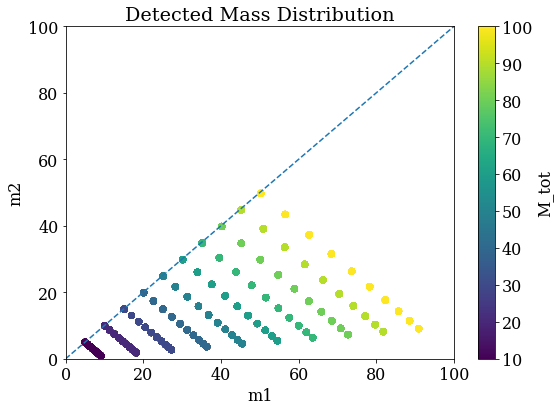

In [11]:
# Mass Distribution
plot_bias_features(df["m1"], df["m2"], df["M_tot"], colormap="viridis", mtot=None,\
    title="Detected Mass Distribution", xlabel="m1", ylabel="m2", cbar_label="M_tot", plt_show=False)# savefig='mass_dist')
mmax = 100
plt.xlim(0, mmax)
plt.ylim(0, mmax)
x=np.linspace(0, mmax, 10)
plt.plot(x, x, '--')


In [12]:
df["z"].iloc[0]

1.1866188867198053

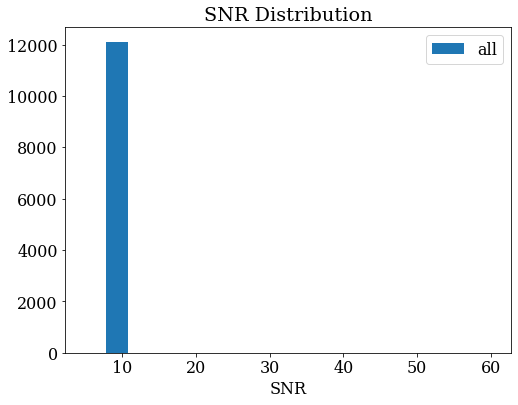

In [13]:
# SNR Distribution
fig, ax = plt.subplots(figsize=(8, 6))

bins = np.linspace(5, 50+np.max(df["snr"]), 20)

plt.hist(df["snr"], bins, label="all")

z = df["z"].iloc[0]

# for mtot in mtots:
#     mask = (df["M_tot"] < mtot*(1.1+ z)) * (df["M_tot"]> mtot*(0.9+ z)) 
#     plt.hist(df["snr"][mask], bins, histtype='step', lw=3, label=f"Mtot={mtot} $M_\odot$")


plt.xlabel("SNR")
plt.ylabel("")
plt.legend(loc='upper right')
plt.title("SNR Distribution")

# plt.savefig(plotdir + 'snr_dist.pdf')
plt.show()

[-0.999  -0.7992 -0.5994 -0.3996 -0.1998  0.      0.1998  0.3996  0.5994
  0.7992  0.999 ]


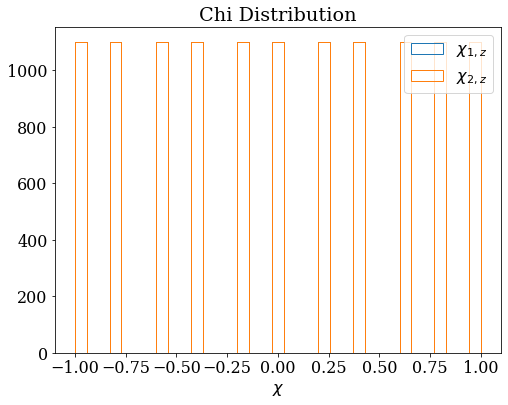

In [21]:
# Chi Distribution
fig, ax = plt.subplots(figsize=(8, 6))

# bins = np.linspace(5, 50+np.max(df["snr"]), 20)
print(np.unique(df["chi1z"]))

plt.hist(df["chi1z"], bins=35, histtype='step', label="$\chi_{1,z}$")
plt.hist(df["chi2z"], bins=35, histtype='step', label="$\chi_{2,z}$")


plt.xlabel("$\chi$")
plt.ylabel("")
plt.legend(loc='upper right')
plt.title("Chi Distribution")

plt.show()

In [42]:
df["M_tot"]

0         10.0
1         10.0
2         10.0
3         10.0
4         10.0
         ...  
12095    100.0
12096    100.0
12097    100.0
12098    100.0
12099    100.0
Name: M_tot, Length: 12100, dtype: float64

# Faithfulness

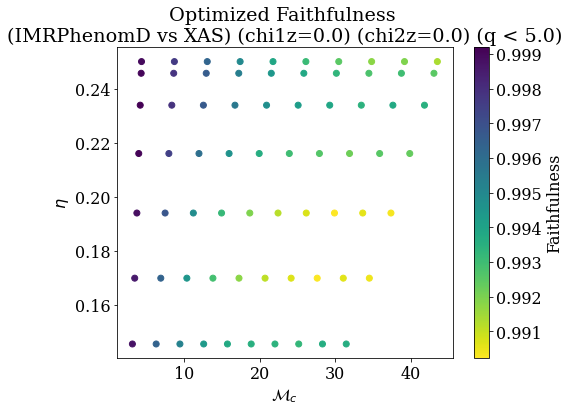

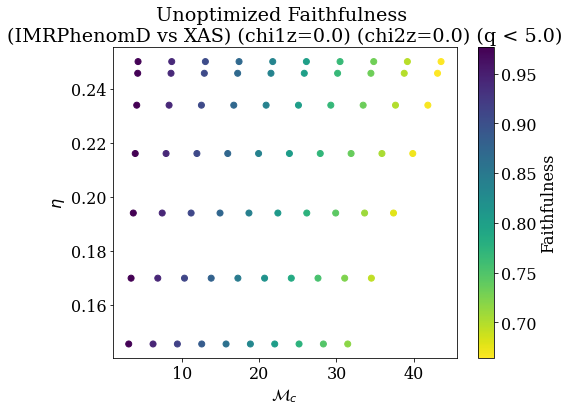

In [110]:
mtot=None
qmax=5.0
chi1z=0.0
chi2z=0.0

plot_bias_features(df["Mc"], df["eta"], df["full_faith"], mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="viridis_r", 
    title="Optimized Faithfulness \n(IMRPhenomD vs XAS)", xlabel="$\mathcal{M}_{c}$", ylabel="$\eta$", cbar_label="Faithfulness")

plot_bias_features(df["Mc"], df["eta"], df["full_inner_prod"], mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="viridis_r", 
    title="Unoptimized Faithfulness \n(IMRPhenomD vs XAS)", xlabel="$\mathcal{M}_{c}$", ylabel="$\eta$", cbar_label="Faithfulness")


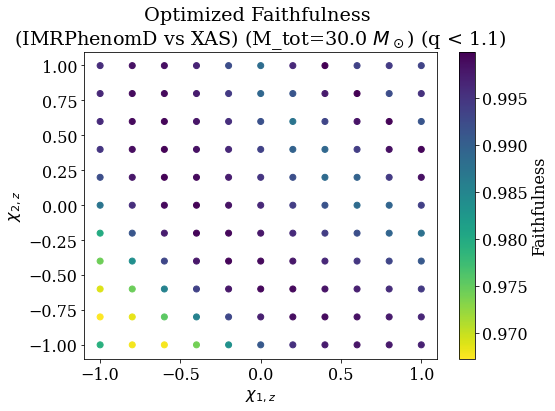

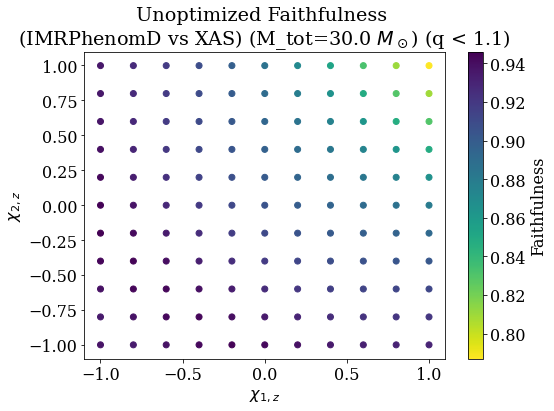

In [109]:
mtot=30.0
qmax=1.1
chi1z=None
chi2z=None

plot_bias_features(df["chi1z"], df["chi2z"], df["full_faith"], mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="viridis_r", 
    title="Optimized Faithfulness \n(IMRPhenomD vs XAS)", xlabel="$\chi_{1,z}$", ylabel="$\chi_{2,z}$", cbar_label="Faithfulness")

plot_bias_features(df["chi1z"], df["chi2z"], df["full_inner_prod"], mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="viridis_r", 
    title="Unoptimized Faithfulness \n(IMRPhenomD vs XAS)", xlabel="$\chi_{1,z}$", ylabel="$\chi_{2,z}$", cbar_label="Faithfulness")

# Relative Bias vs Faithfulness

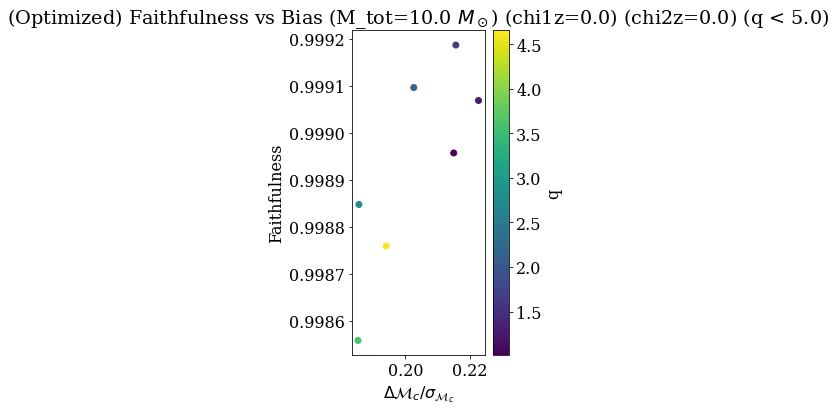

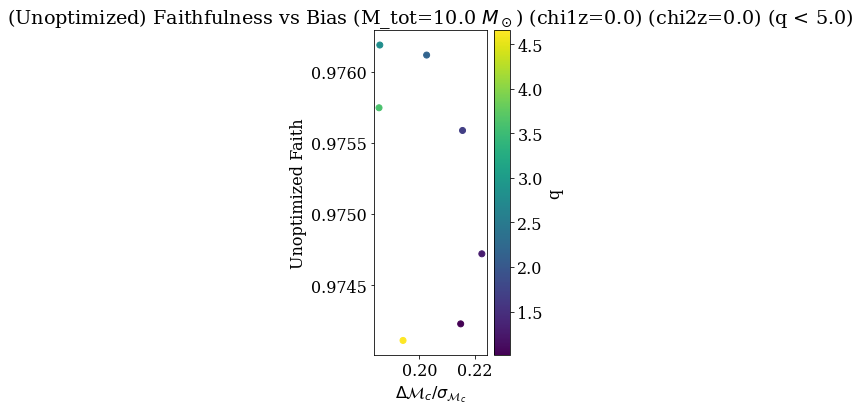

In [172]:
mtot=10.0
qmax=5.0
chi1z=0.0
chi2z=0.0

plot_bias_features(np.abs(df["Mc_full_bias"]/df["Mc_stat_err"]), df["full_faith"], df["q"], mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="viridis", 
    title="(Optimized) Faithfulness vs Bias", xlabel="$\Delta \mathcal{M}_{c} / \sigma_{\mathcal{M}_{c}}$", ylabel="Faithfulness", cbar_label="q", plt_show=False)

plot_bias_features(np.abs(df["Mc_full_bias"]/df["Mc_stat_err"]), df["full_inner_prod"], df["q"],  mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="viridis", 
    title="(Unoptimized) Faithfulness vs Bias", xlabel="$\Delta \mathcal{M}_{c} / \sigma_{\mathcal{M}_{c}}$", ylabel="Unoptimized Faith",  cbar_label="q", savefig='unopt_faith_vs_mc_bias')

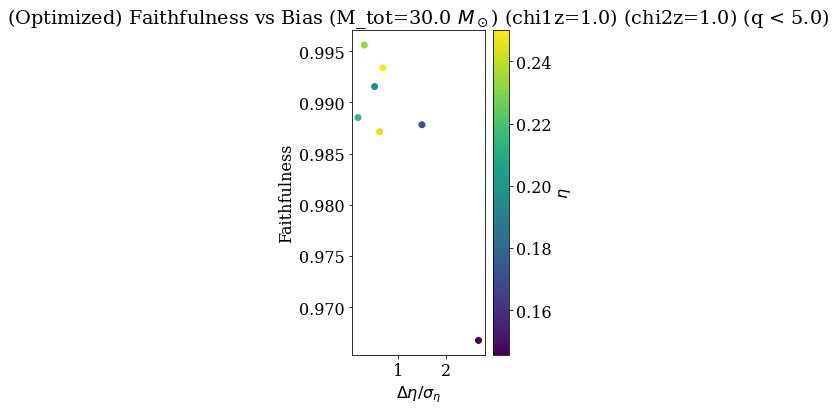

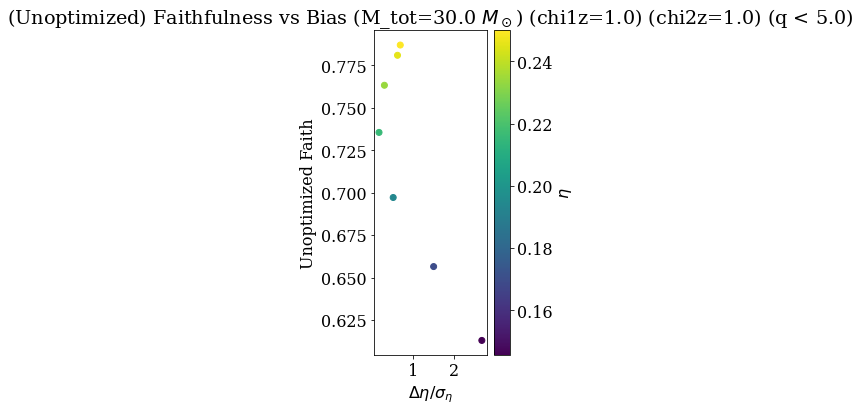

In [168]:
mtot=30.0
qmax=5.0
chi1z=1.0
chi2z=1.0

plot_bias_features(np.abs(df["eta_full_bias"]/df["eta_stat_err"]), df["full_faith"], df["eta"], mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="viridis", 
    title="(Optimized) Faithfulness vs Bias", xlabel="$\Delta \eta / \sigma_\eta$", ylabel="Faithfulness", cbar_label="$\eta$", plt_show=False)


plot_bias_features(np.abs(df["eta_full_bias"]/df["eta_stat_err"]), df["full_inner_prod"], df["eta"], mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="viridis", 
    title="(Unoptimized) Faithfulness vs Bias", xlabel="$\Delta \eta / \sigma_\eta$", ylabel="Unoptimized Faith", cbar_label="$\eta$", savefig='unopt_faith_vs_eta_bias', plt_show=False)

# plt.semilogx()

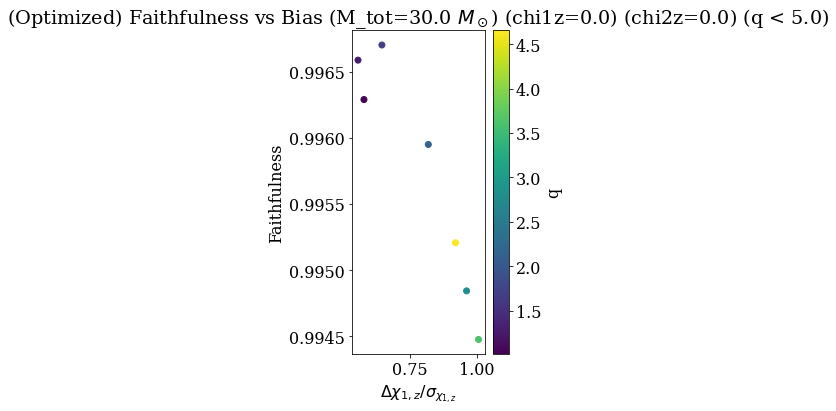

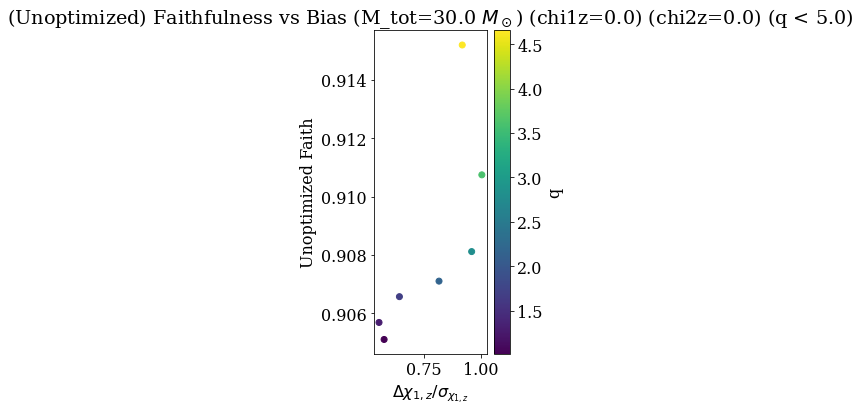

In [64]:
mtot=30.0
qmax=5.0
chi1z=0.0
chi2z=0.0

plot_bias_features(np.abs(df["chi1z_full_bias"]/df["chi1z_stat_err"]), df["full_faith"], df["q"], mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="viridis", 
    title="(Optimized) Faithfulness vs Bias", xlabel="$\Delta \chi_{1,z} / \sigma_{\chi_{1,z}}$", ylabel="Faithfulness", cbar_label="q", plt_show=False)


plot_bias_features(np.abs(df["chi1z_full_bias"]/df["chi1z_stat_err"]), df["full_inner_prod"], df["q"], mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="viridis", 
    title="(Unoptimized) Faithfulness vs Bias", xlabel="$\Delta \chi_{1,z} / \sigma_{\chi_{1,z}}$", ylabel="Unoptimized Faith", cbar_label="q", savefig='unopt_faith_vs_chi1z_bias', plt_show=False)



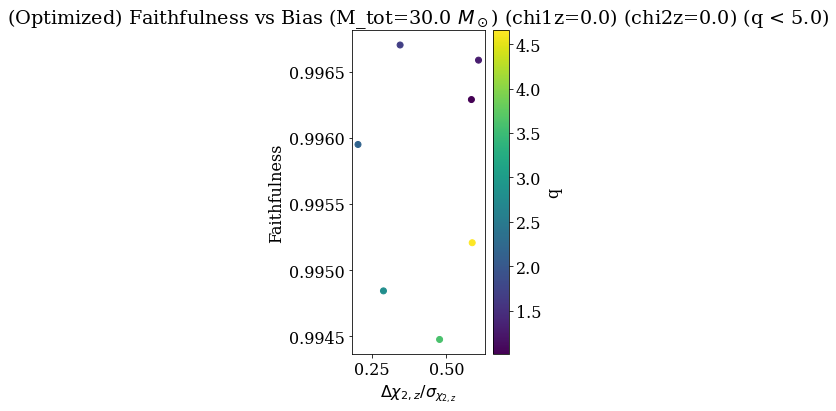

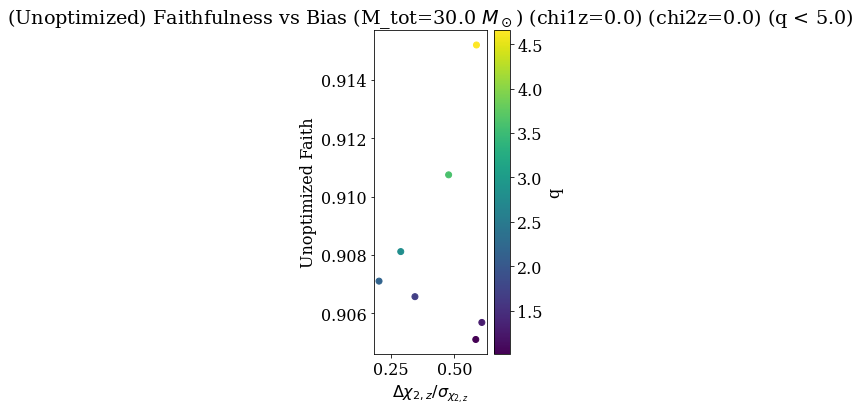

In [65]:
mtot=30.0
qmax=5.0
chi1z=0.0
chi2z=0.0

plot_bias_features(np.abs(df["chi2z_full_bias"]/df["chi2z_stat_err"]), df["full_faith"], df["q"], mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="viridis", 
    title="(Optimized) Faithfulness vs Bias", xlabel="$\Delta \chi_{2,z} / \sigma_{\chi_{2,z}}$", ylabel="Faithfulness", cbar_label="q", plt_show=False)


plot_bias_features(np.abs(df["chi2z_full_bias"]/df["chi2z_stat_err"]), df["full_inner_prod"], df["q"], mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="viridis", 
    title="(Unoptimized) Faithfulness vs Bias", xlabel="$\Delta \chi_{2,z} / \sigma_{\chi_{2,z}}$", ylabel="Unoptimized Faith", cbar_label="q", savefig='unopt_faith_vs_chi1z_bias', plt_show=False)


# Relative Bias Histograms

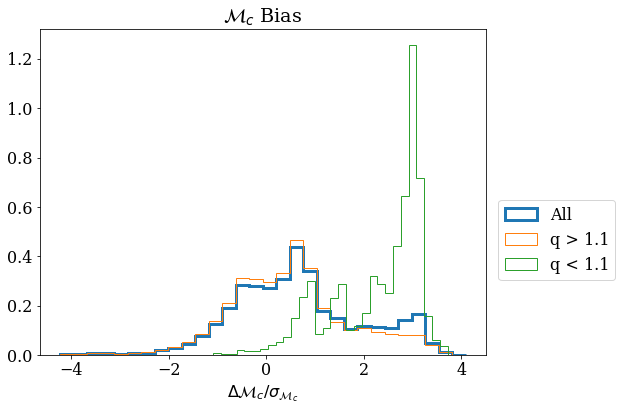

In [190]:
mtot=None
qmax=10.0
qmin=1.2

chi1z_max=1
chi1z_min=-1

chi2z_max=1
chi2z_min=-1


data = df["Mc_full_bias"]/df["Mc_stat_err"]


fig, ax = plt.subplots(figsize=(8, 6))

plt.hist(data, bins=30, histtype='step', lw=3, label="All", density=True)

q_cut = 1.1
mask = (df["q"]>q_cut)
plt.hist(data[mask], bins=30, histtype='step', label=f"q > {q_cut}", density=True)
mask = (df["q"]<q_cut)
plt.hist(data[mask], bins=30, histtype='step', label=f"q < {q_cut}", density=True)

# Slices

# for chi1z in np.unique(df["chi1z"])[:]:
#     mask_1 = (df["chi1z"] > chi1z-0.01)*(df["chi1z"] < chi1z+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"chi1z = {chi1z:.2f}", density=True)

# for chi2z in np.unique(df["chi2z"])[:]:
#     mask_1 = (df["chi2z"] > chi2z-0.01)*(df["chi2z"] < chi2z+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"chi2z = {chi2z:.2f}", density=True)

# for mtot in np.unique(df["M_tot"])[::2]:
#     mask_1 = (df["M_tot"] > mtot-0.01)*(df["M_tot"] < mtot+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"mtot = {mtot:.2f}", density=True)

# for q in np.unique(df["q"])[::3]:
#     mask_1 = (df["q"] > q-0.01)*(df["q"] < q+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"q = {q:.2f}", density=True)

# plt.semilogy()
plt.xlabel("$\Delta \mathcal{M}_{c} / \sigma_{\mathcal{M}_{c}}$")
plt.title("$\mathcal{M}_{c}$ Bias")
plt.legend(bbox_to_anchor=(1.01, 0.5))

# plt.show()

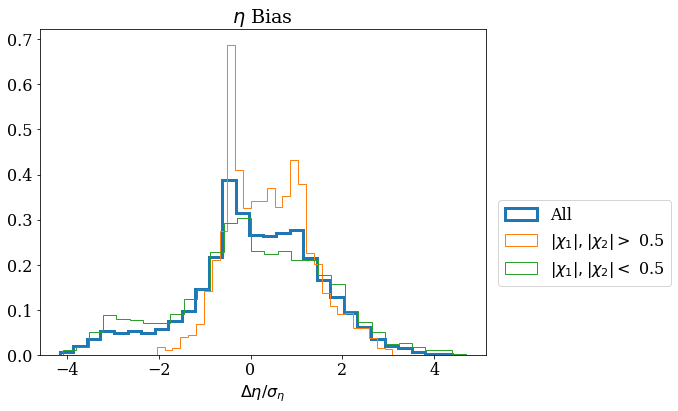

In [191]:
mtot=None
qmax=10.0
qmin=0.0

chi1z_max = 0.1
chi1z_min = -0.1

chi2z_max = 0.1
chi2z_min = -0.1


data = df["eta_full_bias"]/df["eta_stat_err"]


fig, ax = plt.subplots(figsize=(8, 6))

plt.hist(data, bins=30, histtype='step', lw=3, label="All", density=True)


chi_cut = 0.5
mask = (np.abs(df["chi1z"]) < chi_cut)*(np.abs(df["chi2z"]) < chi_cut)
plt.hist(data[mask], bins=30, histtype='step', label=f"$|\chi_1| , |\chi_2| >$ {chi_cut}", density=True)
mask = (np.abs(df["chi1z"]) > chi_cut)*(np.abs(df["chi2z"]) > chi_cut)
plt.hist(data[mask], bins=30, histtype='step', label=f"$|\chi_1| , |\chi_2| <$ {chi_cut}", density=True)


# Slices

# for mtot in np.unique(df["M_tot"])[::2]:
#     mask_1 = (df["M_tot"] > mtot-0.01)*(df["M_tot"] < mtot+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"mtot = {mtot:.2f}", density=True)

# for q in np.unique(df["q"])[::3]:
#     mask_1 = (df["q"] > q-0.01)*(df["q"] < q+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"q = {q:.2f}", density=False)

# for chi1z in np.unique(df["chi1z"])[:]:
#     mask_1 = (df["chi1z"] > chi1z-0.01)*(df["chi1z"] < chi1z+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"chi1z = {chi1z:.2f}", density=True)

# for chi2z in np.unique(df["chi2z"])[:]:
#     mask_1 = (df["chi2z"] > chi2z-0.01)*(df["chi2z"] < chi2z+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"chi2z = {chi2z:.2f}", density=True)

# plt.semilogy()
plt.xlabel("$\Delta \eta / \sigma_{\eta}$")
plt.title("$\eta$ Bias")
plt.legend(bbox_to_anchor=(1.01, 0.5))

plt.show()

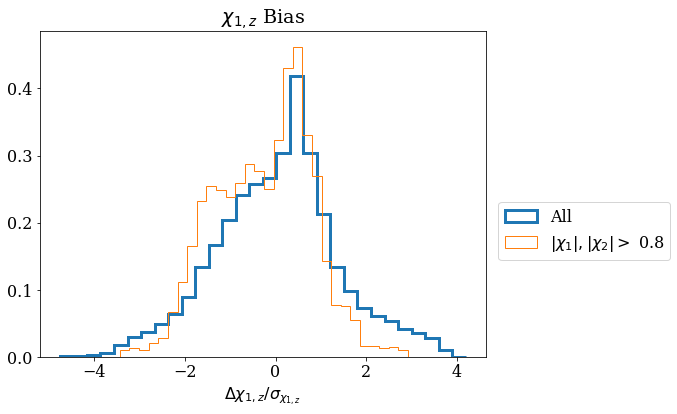

In [207]:


data = df["chi1z_full_bias"]/df["chi1z_stat_err"]


fig, ax = plt.subplots(figsize=(8, 6))

plt.hist(data, bins=30, histtype='step', lw=3, label="All", density=True)


chi_cut = 0.8
mask = ((df["chi1z"]) < 0)*((df["chi2z"]) > 0)
plt.hist(data[mask], bins=30, histtype='step', label=f"$|\chi_1| , |\chi_2| >$ {chi_cut}", density=True)
# mask = (np.abs(df["chi1z"]) > 0.5)*(np.abs(df["chi2z"]) > chi_cut)
# plt.hist(data[mask], bins=30, histtype='step', label=f"$|\chi_1| , |\chi_2| <$ {chi_cut}", density=True)


# Slices

# for mtot in np.unique(df["M_tot"])[::2]:
#     mask_1 = (df["M_tot"] > mtot-0.01)*(df["M_tot"] < mtot+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"mtot = {mtot:.2f}", density=True)

# for q in np.unique(df["q"])[::3]:
#     mask_1 = (df["q"] > q-0.01)*(df["q"] < q+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"q = {q:.2f}", density=False)

# for chi1z in np.unique(df["chi1z"])[:]:
#     mask_1 = (df["chi1z"] > chi1z-0.01)*(df["chi1z"] < chi1z+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"chi1z = {chi1z:.2f}", density=True)

# for chi2z in np.unique(df["chi2z"])[:]:
#     mask_1 = (df["chi2z"] > chi2z-0.01)*(df["chi2z"] < chi2z+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"chi2z = {chi2z:.2f}", density=True)

# plt.semilogy()
plt.xlabel("$\Delta \chi_{1,z} / \sigma_{\chi_{1,z}}$")
plt.title("$\chi_{1,z}$ Bias")
plt.legend(bbox_to_anchor=(1.01, 0.5))

plt.show()


# low bias peak from low masses. wide tails from higher masses.
# peak: for 

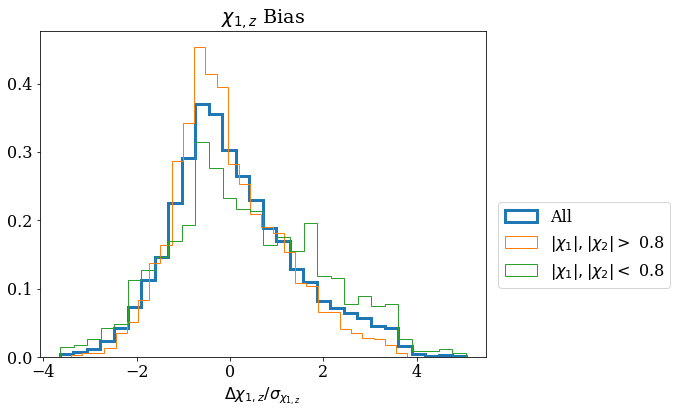

In [196]:
mtot=None
qmax=10.0
qmin=0.0

chi1z_max = 0.1
chi1z_min = -0.1

chi2z_max = 0.1
chi2z_min = -0.1


data = df["chi2z_full_bias"]/df["chi2z_stat_err"]


fig, ax = plt.subplots(figsize=(8, 6))

plt.hist(data, bins=30, histtype='step', lw=3, label="All", density=True)


chi_cut = 0.8
mask = (np.abs(df["chi1z"]) < 0.5)*(np.abs(df["chi2z"]) < chi_cut)
plt.hist(data[mask], bins=30, histtype='step', label=f"$|\chi_1| , |\chi_2| >$ {chi_cut}", density=True)
mask = (np.abs(df["chi1z"]) > 0.5)*(np.abs(df["chi2z"]) > chi_cut)
plt.hist(data[mask], bins=30, histtype='step', label=f"$|\chi_1| , |\chi_2| <$ {chi_cut}", density=True)


# Slices

# for mtot in np.unique(df["M_tot"])[::2]:
#     mask_1 = (df["M_tot"] > mtot-0.01)*(df["M_tot"] < mtot+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"mtot = {mtot:.2f}", density=True)

# for q in np.unique(df["q"])[::3]:
#     mask_1 = (df["q"] > q-0.01)*(df["q"] < q+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"q = {q:.2f}", density=False)

# for chi1z in np.unique(df["chi1z"])[:]:
#     mask_1 = (df["chi1z"] > chi1z-0.01)*(df["chi1z"] < chi1z+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"chi1z = {chi1z:.2f}", density=True)

# for chi2z in np.unique(df["chi2z"])[:]:
#     mask_1 = (df["chi2z"] > chi2z-0.01)*(df["chi2z"] < chi2z+0.01)
#     plt.hist(data[mask_1], bins=30, histtype='step', label=f"chi2z = {chi2z:.2f}", density=True)

# plt.semilogy()
plt.xlabel("$\Delta \chi_{1,z} / \sigma_{\chi_{1,z}}$")
plt.title("$\chi_{1,z}$ Bias")
plt.legend(bbox_to_anchor=(1.01, 0.5))

plt.show()

# Error over Mc, eta grid

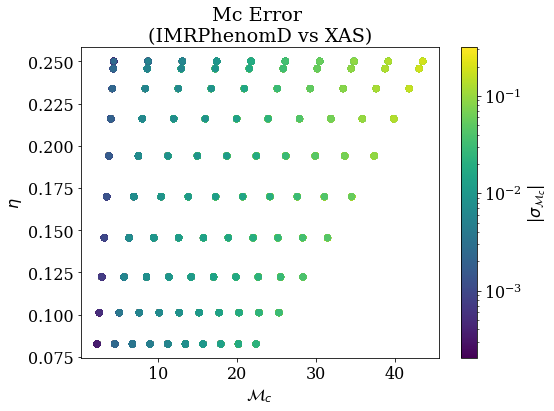

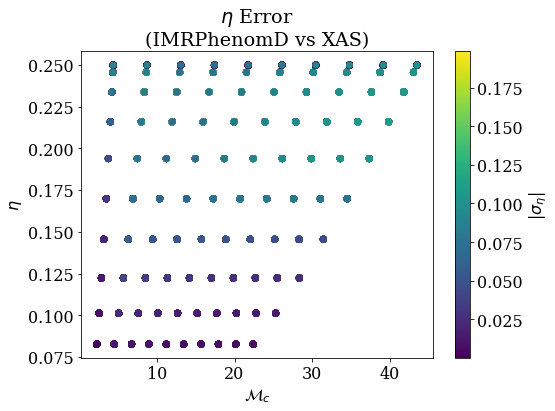

In [16]:
plot_bias_features(df["Mc"], df["eta"], np.abs(df["Mc_stat_err"]), mtot=None, colormap="viridis", 
    title="Mc Error \n(IMRPhenomD vs XAS)", xlabel="$\mathcal{M}_{c}$", ylabel="$\eta$", cbar_label="|$\sigma_{\mathcal{M}_{c}}$|", norm=LogNorm())

plot_bias_features(df["Mc"], df["eta"], np.abs(df["eta_stat_err"]), mtot=None, colormap="viridis", 
    title="$\eta$ Error \n(IMRPhenomD vs XAS)", xlabel="$\mathcal{M}_{c}$", ylabel="$\eta$", cbar_label="|$\sigma_{\eta}$|")

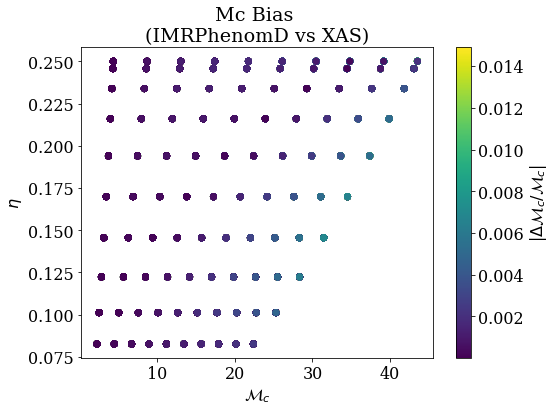

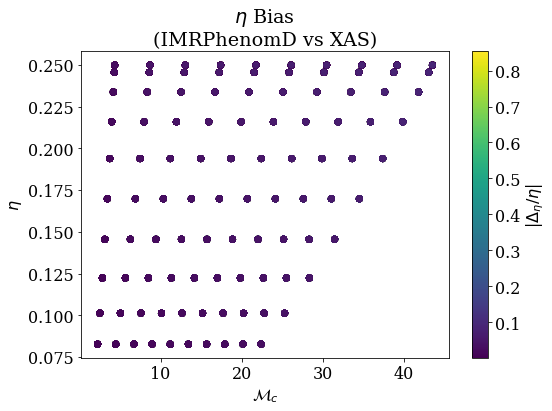

In [66]:
plot_bias_features(df["Mc"], df["eta"], np.abs(df["Mc_full_bias"]/df["Mc"]), mtot=None, colormap="viridis", 
    title="Mc Bias \n(IMRPhenomD vs XAS)", xlabel="$\mathcal{M}_{c}$", ylabel="$\eta$", cbar_label="|$\Delta {\mathcal{M}_{c}} / \mathcal{M}_{c} $|", savefig='mc_relative_bias_grid')

plot_bias_features(df["Mc"], df["eta"], np.abs(df["eta_stat_err"]/ df["eta"]), mtot=None, colormap="viridis", 
    title="$\eta$ Bias \n(IMRPhenomD vs XAS)", xlabel="$\mathcal{M}_{c}$", ylabel="$\eta$", cbar_label="|$\Delta_{\eta}/\eta$|", savefig='eta_relative_bias_grid')

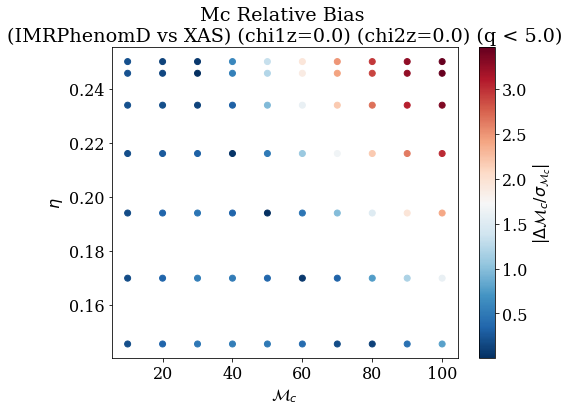

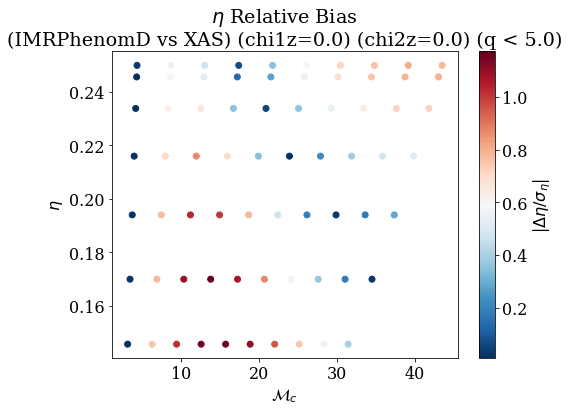

In [179]:
mtot=None
qmax=5.0
chi1z=.0
chi2z=.0

plot_bias_features(df["M_tot"], df["eta"], np.abs(df["Mc_full_bias"]/df["Mc_stat_err"]), mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="RdBu_r", #vmin=0.0, vmax=3.0,
    title="Mc Relative Bias \n(IMRPhenomD vs XAS)", xlabel="$\mathcal{M}_{c}$", ylabel="$\eta$", cbar_label="|$\Delta \mathcal{M}_{c} / \sigma_{\mathcal{M}_{c}}$|", savefig='mc_bias_sigma_grid')

plot_bias_features(df["Mc"], df["eta"], np.abs(df["eta_full_bias"]/df["eta_stat_err"]), mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="RdBu_r",# vmin=0.0, vmax=3.0,
    title="$\eta$ Relative Bias \n(IMRPhenomD vs XAS)", xlabel="$\mathcal{M}_{c}$", ylabel="$\eta$", cbar_label="|$\Delta \eta / \sigma_{\eta}$|", savefig='eta_bias_sigma_grid')

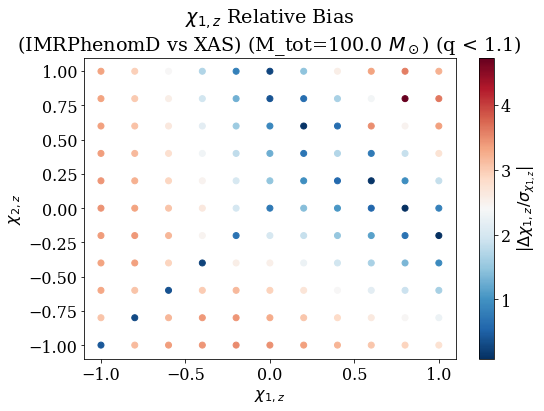

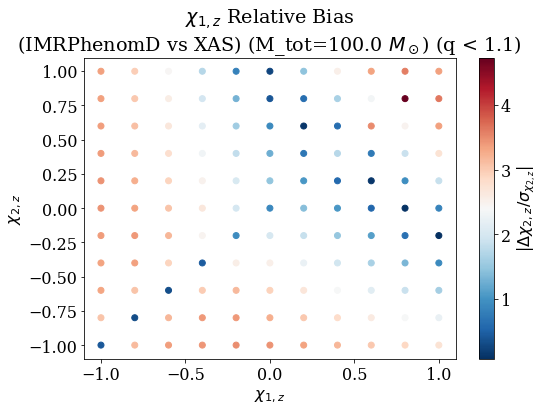

In [182]:
mtot=100.0
qmax=1.1
chi1z=None
chi2z=None

plot_bias_features(df["chi1z"], df["chi2z"], np.abs(df["chi1z_full_bias"]/df["chi1z_stat_err"]), mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="RdBu_r",# vmin=0.0, vmax=3.0,
    title="$\chi_{1,z}$ Relative Bias \n(IMRPhenomD vs XAS)", xlabel="$\chi_{1,z}$", ylabel="$\chi_{2,z}$", cbar_label="|$\Delta \chi_{1,z} / \sigma_{\chi_{1,z}}$|", savefig='chi1z_bias_sigma_grid')

plot_bias_features(df["chi1z"], df["chi2z"], np.abs(df["chi2z_full_bias"]/df["chi2z_stat_err"]), mtot=mtot, chi1z=chi1z, chi2z=chi2z, qmax=qmax, colormap="RdBu_r",# vmin=0.0, vmax=3.0,
    title="$\chi_{1,z}$ Relative Bias \n(IMRPhenomD vs XAS)", xlabel="$\chi_{1,z}$", ylabel="$\chi_{2,z}$", cbar_label="|$\Delta \chi_{2,z} / \sigma_{\chi_{2,z}}$|", savefig='chi1z_bias_sigma_grid')

# Other Plots

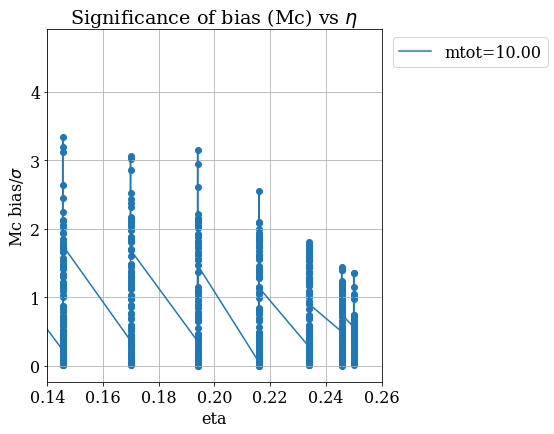

In [72]:

y = np.abs(df["Mc_full_bias"]/df["Mc_stat_err"])
ylabel="Mc bias/$\sigma$"

x = df["eta"]
xlabel="eta"

title="Significance of bias (Mc) vs $\eta$"
    
fig, ax1 = plt.subplots(figsize=(8,6))
mtots = np.linspace(10.0, 100.0, 10)

for m in mtots[:1]:
    mask = (df["M_tot"]< 1.01*m) * (df["M_tot"]>0.99*m) * (df["eta"]>0.05)
    ax1.scatter(x[mask], y[mask])
    ax1.plot(x[mask], y[mask], label=f"mtot={m:.2f}")

ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)

ax1.grid(which='both')

plt.xlim(0.14, 0.26)
# plt.semilogx()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.title(title)
plt.show()

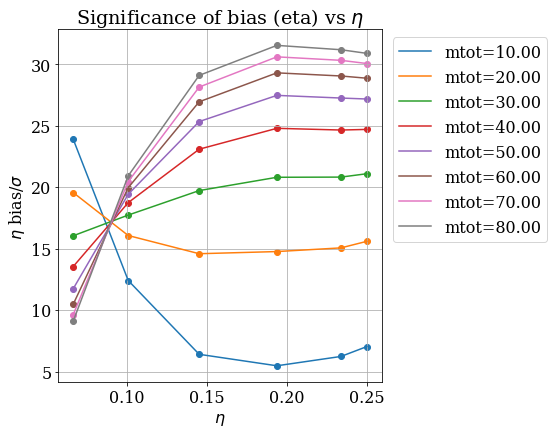

In [25]:
y = np.abs(df["eta_full_bias"]/df["eta_stat_err"])
ylabel="$\eta$ bias/$\sigma$"

x = df["eta"]
xlabel="$\eta$"

title="Significance of bias (eta) vs $\eta$"
    
fig, ax1 = plt.subplots(figsize=(8,6))

for m in mtots[:]:
    mask = (df["M_tot"]< 1.01*m) * (df["M_tot"]>0.99*m) * (df["eta"]>0.05)
    ax1.scatter(x[mask], y[mask])
    ax1.plot(x[mask], y[mask], label=f"mtot={m:.2f}")

ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)

ax1.grid(which='both')

# plt.semilogx()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.title(title)
plt.show()

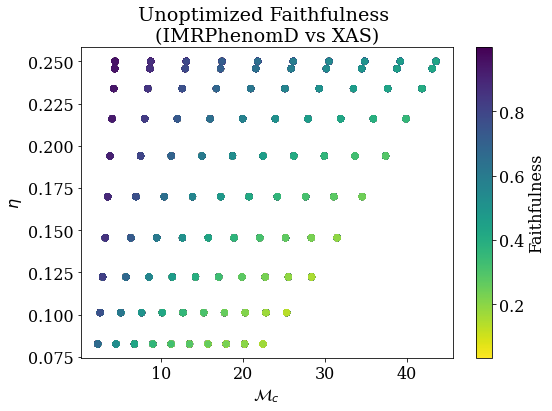

In [73]:
plot_bias_features(df["Mc"], df["eta"], df["full_inner_prod"], mtot=None, colormap="viridis_r", 
    title="Unoptimized Faithfulness \n(IMRPhenomD vs XAS)", xlabel="$\mathcal{M}_{c}$", ylabel="$\eta$", cbar_label="Faithfulness",  savefig='grid_faith_dist')


In [74]:
# plot_bias_features(df["Mc"], df["eta"], df["Mc_min_inner_prod"], mtot=None, colormap="viridis_r", 
#     title="Faithfulness Required \n(IMRPhenomD vs XAS)", xlabel="$\mathcal{M}_{c}$", ylabel="$\eta$", cbar_label="Faithfulness")

# plot_bias_features(df["Mc"], df["eta"], df["eta_min_inner_prod"], mtot=None, colormap="viridis_r", 
#     title="Faithfulness Required \n(IMRPhenomD vs XAS)", xlabel="$\mathcal{M}_{c}$", ylabel="$\eta$", cbar_label="Faithfulness")

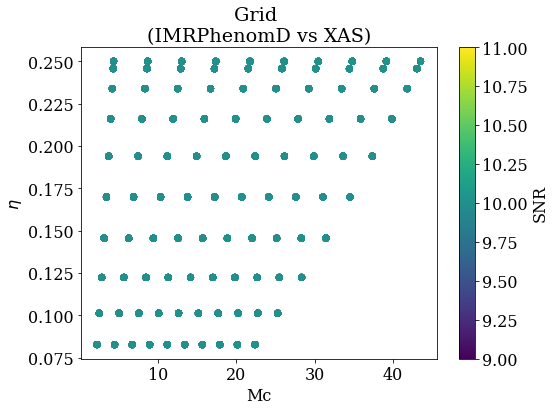

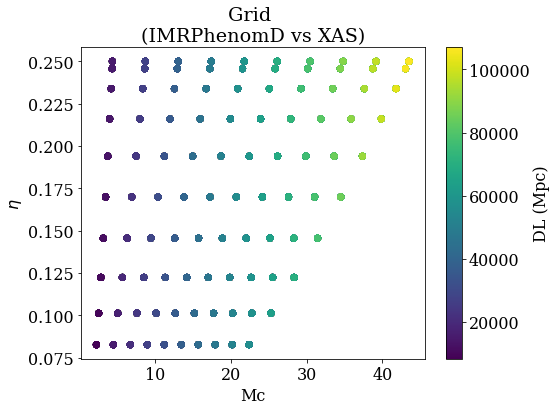

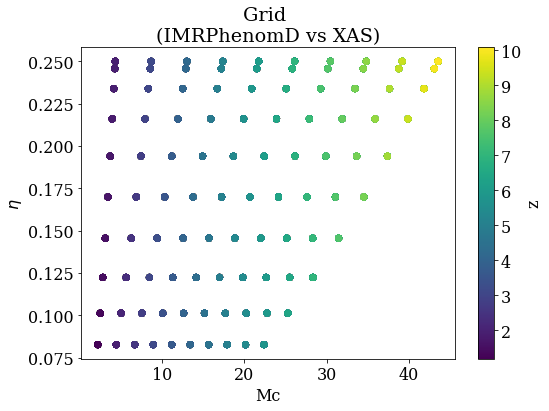

In [75]:
plot_bias_features(df["Mc"], df["eta"], df["snr"], mtot=None, colormap="viridis", 
                   title="Grid \n(IMRPhenomD vs XAS)", xlabel="Mc", ylabel="$\eta$", cbar_label="SNR")

plot_bias_features(df["Mc"], df["eta"], df["DL"], mtot=None, colormap="viridis", 
                   title="Grid \n(IMRPhenomD vs XAS)", xlabel="Mc", ylabel="$\eta$", cbar_label="DL (Mpc)")
plot_bias_features(df["Mc"], df["eta"], df["z"], mtot=None, colormap="viridis", 
                   title="Grid \n(IMRPhenomD vs XAS)", xlabel="Mc", ylabel="$\eta$", cbar_label="z")


## In general, increasing Mc or eta == increasing bias

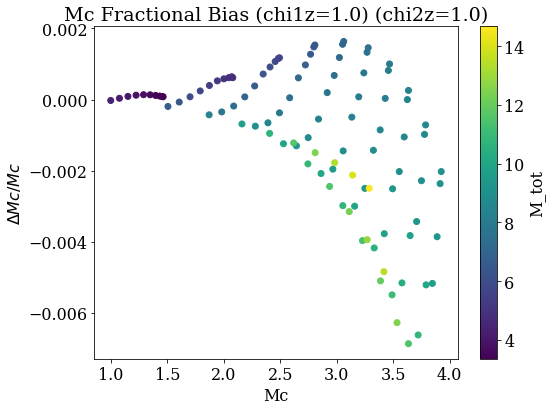

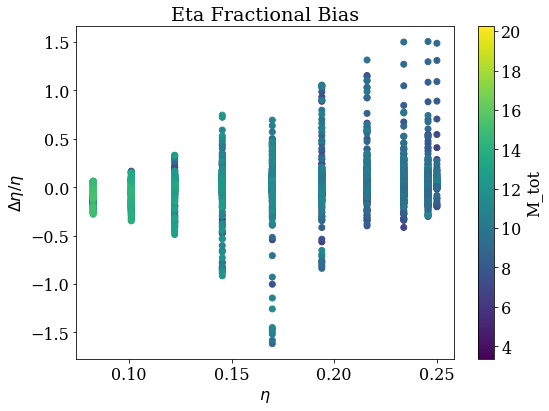

In [83]:
plot_bias_features(df["Mc"]/(1+df["z"]), df["Mc_full_bias"]/df["Mc"], df["M_tot"]/(1+df["z"]), chi1z=1.0, chi2z=1.0, mtot=None, colormap="viridis", 
    title="Mc Fractional Bias", xlabel="Mc", ylabel="$\Delta Mc / Mc$", cbar_label="M_tot", savefig='mc_frac_bias')

plot_bias_features(df["eta"], df["eta_full_bias"]/df["eta"], df["M_tot"]/(1+df["z"]), mtot=None, colormap="viridis", 
    title="Eta Fractional Bias", xlabel="$\eta$", ylabel="$\Delta \eta / \eta$", cbar_label="M_tot", plt_show=False, savefig='eta_frac_bias')


Also, this bias is statistically significant given the small errors in 3G detectors.

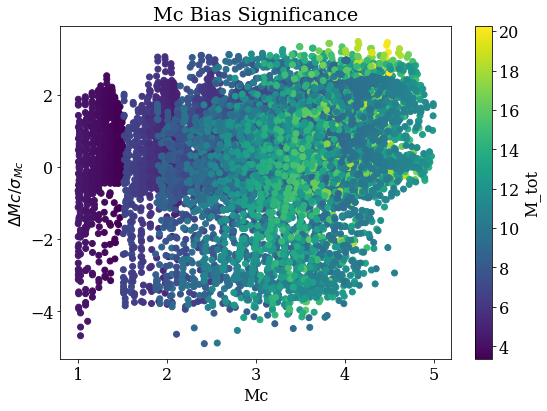

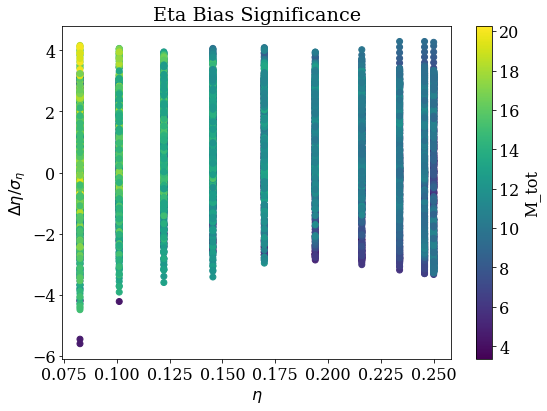

In [84]:
plot_bias_features(df["Mc"]/(1+df["z"]), df["Mc_full_bias"]/df["Mc_stat_err"], df["M_tot"]/(1+df["z"]), mtot=None, colormap="viridis", 
    title="Mc Bias Significance", xlabel="Mc", ylabel="$\Delta Mc / \sigma_{Mc}$", cbar_label="M_tot", savefig='mc_bias_significance')

plot_bias_features(df["eta"], df["eta_full_bias"]/df["eta_stat_err"], df["M_tot"]/(1+df["z"]), mtot=None, colormap="viridis", 
    title="Eta Bias Significance", xlabel="$\eta$", ylabel="$\Delta \eta / \sigma_\eta$", cbar_label="M_tot", plt_show=False, savefig='eta_bias_significance')


## Higher Mc, eta == lesser time in band

Larger total mass and more unequal mass ratios increase the inspiral time.

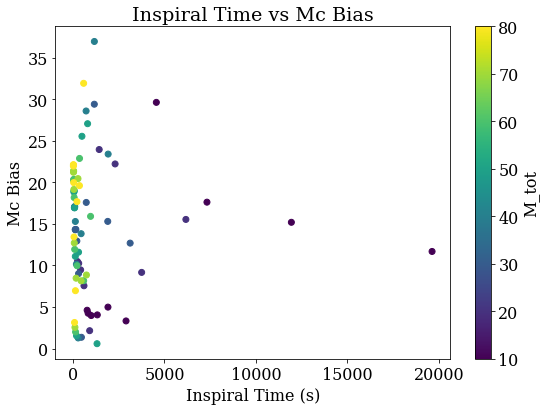

In [15]:
plot_bias_features(df["inspiral_t"], np.abs(df["Mc_full_bias"]/df["Mc_stat_err"]), df["M_tot"], mtot=None, colormap="viridis", 
    title="Inspiral Time vs Mc Bias", ylabel="Mc Bias", xlabel="Inspiral Time (s)", cbar_label="M_tot")




## Therefore, events that spend lesser time in band == experience more bias

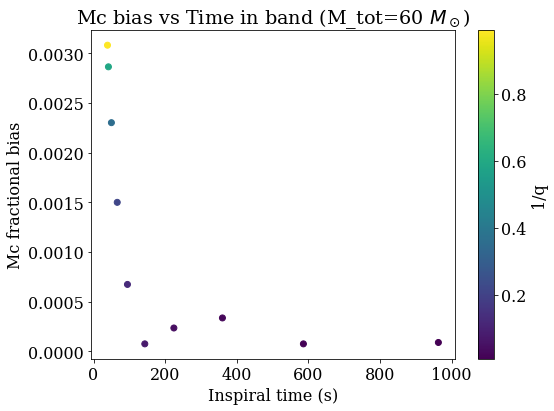

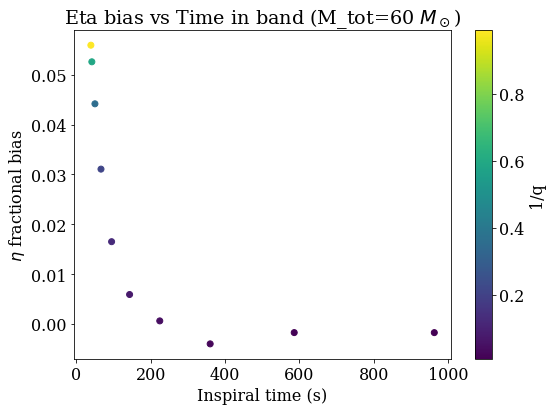

In [44]:
plot_bias_features(df["inspiral_t"], np.abs(df["Mc_full_bias"]/df["Mc"]), 1/df["q"], mtot=60, colormap="viridis",
    title="Mc bias vs Time in band", xlabel="Inspiral time (s)", ylabel="Mc fractional bias", cbar_label="1/q", plt_show=False)
# plt.loglog()

plot_bias_features(df["inspiral_t"], df["eta_full_bias"]/df["eta"], 1/df["q"], mtot=60, colormap="viridis", 
    title="Eta bias vs Time in band", xlabel="Inspiral time (s)", ylabel="$\eta$ fractional bias", cbar_label="1/q", plt_show=False)
# plt.loglog()


Longer inspiral times allow for more cycles, and so the waveform can be calibrated better.

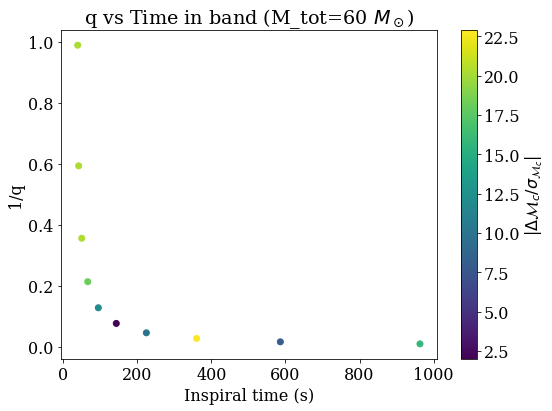

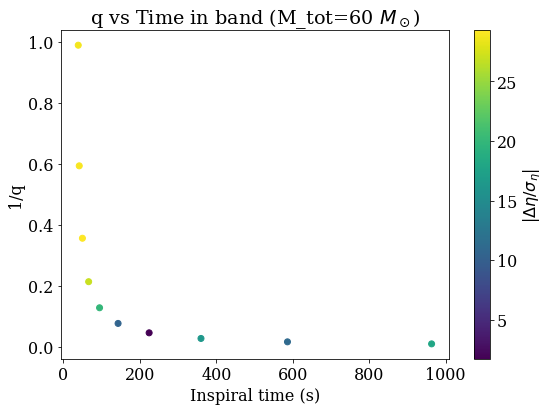

In [40]:
plot_bias_features(df["inspiral_t"], 1/df["q"], np.abs(df["Mc_full_bias"]/df["Mc_stat_err"]), mtot=60, colormap="viridis",
    title="q vs Time in band", xlabel="Inspiral time (s)", ylabel="1/q", cbar_label="|$\Delta \mathcal{M}_{c} / \sigma_{\mathcal{M}_{c}}$|", plt_show=False)
# plt.loglog()

plot_bias_features(df["inspiral_t"], 1/df["q"], np.abs(df["eta_full_bias"]/df["eta_stat_err"]), mtot=60, colormap="viridis", 
    title="q vs Time in band", xlabel="Inspiral time (s)", ylabel="1/q", cbar_label="|$\Delta \eta / \sigma_\eta$|", plt_show=False)
# plt.loglog()


We can put this all together in a nice plot:

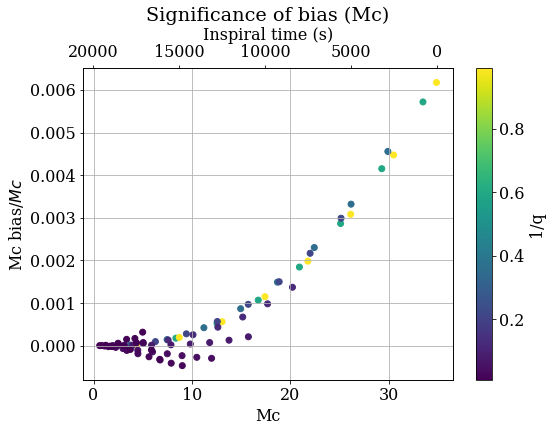

In [29]:
x1 = df["Mc"]
xlabel1 = "Mc"

x2 = df["inspiral_t"]
xlabel2="Inspiral time (s)"

y = df["Mc_full_bias"]/df["Mc"]
ylabel="Mc bias/$Mc$"

title="Significance of bias (Mc)"

# c = df["M_tot"]
# cbar_label="M_tot"

c = 1/df["q"]
cbar_label="1/q"
    
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twiny()

sc = ax1.scatter(x1, y, c=c, cmap='viridis')
cbar = plt.colorbar(sc)
cbar.set_label(cbar_label)

ax2.scatter(x2, y, color='g', alpha=0)

ax1.set_xlabel(xlabel1)
ax2.set_xlabel(xlabel2)

ax1.set_ylabel(ylabel)
ax2.invert_xaxis()

ax1.grid(which='both')

plt.tight_layout()
plt.title(title)
plt.show()


The diagonal line is at q=1, and the mass ratios become more extreme for lower points.

## For a given q, the lower the faithfulness, the larger the bias

In [24]:
# q_range = np.linspace(1, 6, 6)
q_range = np.unique(np.round(df["q"], 3))
# q_range = q_range[:5]
q_range

array([  1.01 ,   1.683,   2.804,   4.673,   7.786,  12.973,  21.617,
        36.018,  60.015, 100.   ])

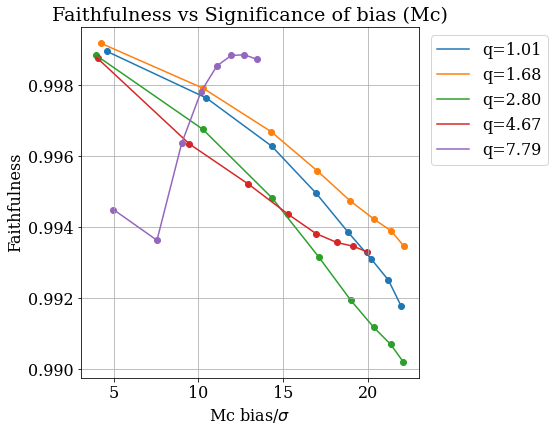

In [26]:
x = df["Mc_full_bias"]/df["Mc_stat_err"]
xlabel="Mc bias/$\sigma$"

y = df["full_faith"]
ylabel="Faithfulness"

title="Faithfulness vs Significance of bias (Mc)"
    
fig, ax1 = plt.subplots(figsize=(8,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.scatter(x[mask_q], y[mask_q])
    ax1.plot(x[mask_q], y[mask_q], label=f"q={q:.2f}")

ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)

ax1.grid(which='both')

# plt.semilogx()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.title(title)
plt.show()

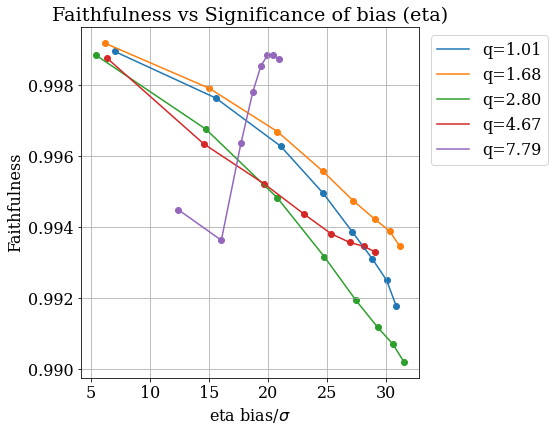

In [27]:
x = df["eta_full_bias"]/df["eta_stat_err"]
xlabel="eta bias/$\sigma$"

y = df["full_faith"]
ylabel="Faithfulness"

title="Faithfulness vs Significance of bias (eta)"
    
fig, ax1 = plt.subplots(figsize=(8,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.scatter(x[mask_q], y[mask_q])
    ax1.plot(x[mask_q], y[mask_q], label=f"q={q:.2f}")

ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)

ax1.grid(which='both')
# plt.semilogx()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.title(title)
plt.show()

This relationship becomes cagey for q > ~6 though.

## The higher the Chirp Mass, the stricter we expect the requirements on Waveform accuracy should be.

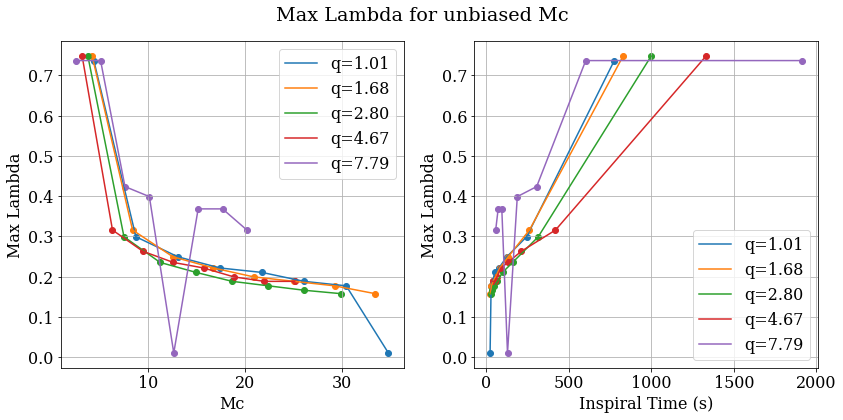

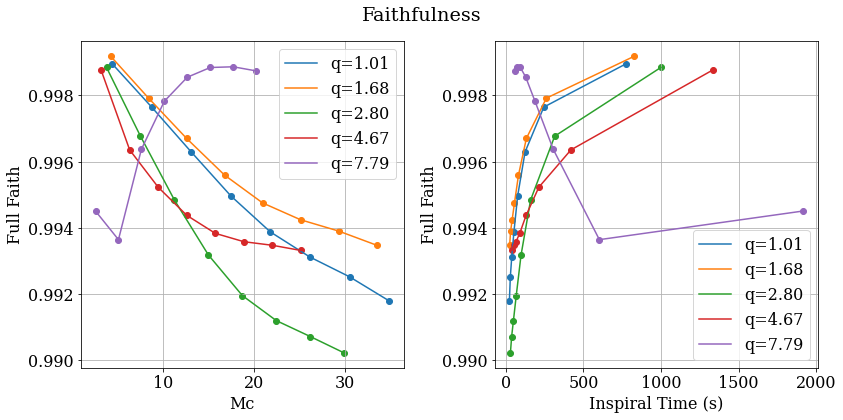

In [28]:
# Sanity check that lambda is being tuned properly

x1 = df["Mc"]
xlabel1="Mc"

x2 = df["inspiral_t"]
xlabel2="Inspiral Time (s)"

y = df["Mc_max_lam"]
ylabel="Max Lambda"

title="Max Lambda for unbiased Mc"
    
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.scatter(x1[mask_q], y[mask_q])
    ax1.plot(x1[mask_q], y[mask_q], label=f"q={q:.2f}")

    ax2.scatter(x2[mask_q], y[mask_q])
    ax2.plot(x2[mask_q], y[mask_q], label=f"q={q:.2f}")

    
ax1.set_xlabel(xlabel1)
ax1.set_ylabel(ylabel)
ax1.grid(which='both')
ax1.legend()

ax2.set_xlabel(xlabel2)
ax2.set_ylabel(ylabel)
ax2.grid(which='both')
ax2.legend()
# ax2.invert_xaxis()


plt.tight_layout()
plt.suptitle(title)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


# Sanity check that lambda is being tuned properly

x1 = df["Mc"]
xlabel1="Mc"

x2 = df["inspiral_t"]
xlabel2="Inspiral Time (s)"

y = df["full_faith"]
ylabel="Full Faith"

title="Faithfulness"
    
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.scatter(x1[mask_q], y[mask_q])
    ax1.plot(x1[mask_q], y[mask_q], label=f"q={q:.2f}")

    ax2.scatter(x2[mask_q], y[mask_q])
    ax2.plot(x2[mask_q], y[mask_q], label=f"q={q:.2f}")

    
ax1.set_xlabel(xlabel1)
ax1.set_ylabel(ylabel)
ax1.grid(which='both')
ax1.legend()

ax2.set_xlabel(xlabel2)
ax2.set_ylabel(ylabel)
ax2.grid(which='both')
ax2.legend()
# ax2.invert_xaxis()


plt.tight_layout()
plt.suptitle(title)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Indeed, we see that for events where IMRPhenomXAS and IMRPhenomD agree well (high faithfulness), the maximum allowed lambda is quite large. When the faithfulness is lower, the lambda requirements are stricter.

# The Min Faithfulness/ lambda debacle

However, lambda does not correlate well with faithfulness. The minimum faithfulness calculated for the same values of lambda is non-monotonic.

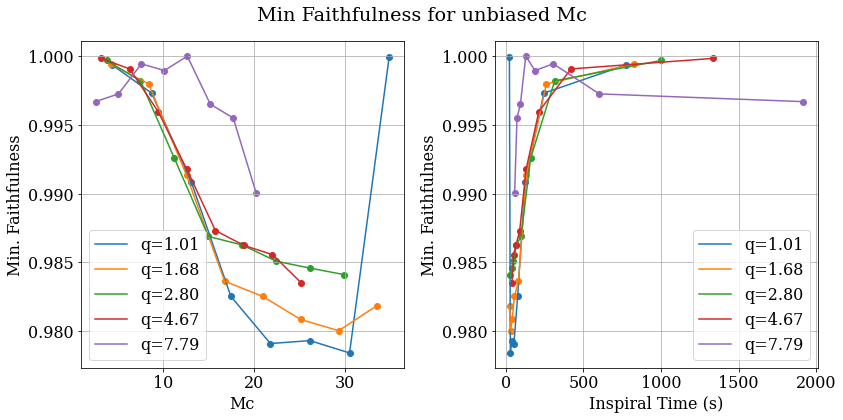

In [29]:
x1 = df["Mc"]
xlabel1="Mc"

x2 = df["inspiral_t"]
xlabel2="Inspiral Time (s)"

y = df["Mc_min_faith"]
ylabel="Min. Faithfulness"

title="Min Faithfulness for unbiased Mc"
    
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.scatter(x1[mask_q], y[mask_q])
    ax1.plot(x1[mask_q], y[mask_q], label=f"q={q:.2f}")

    ax2.scatter(x2[mask_q], y[mask_q])
    ax2.plot(x2[mask_q], y[mask_q], label=f"q={q:.2f}")

    
ax1.set_xlabel(xlabel1)
ax1.set_ylabel(ylabel)
ax1.grid(which='both')
ax1.legend()
# ax1.set_xscale('log')

ax2.set_xlabel(xlabel2)
ax2.set_ylabel(ylabel)
ax2.grid(which='both')
ax2.legend()
# ax2.invert_xaxis()


plt.tight_layout()
plt.suptitle(title)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

We expect to see the min faithfulness increase for large Mc, but for signals below ~200s or Mc below ~15, the relationship is reversed and higher faithfulness is required to keep the bias under 1 sigma. 

### The problem is that faithfulness isn't monotonic with lambda. We are tuning lambda to get the bias under control, but the faithfulness can be lower or higher depending on the event parameters.


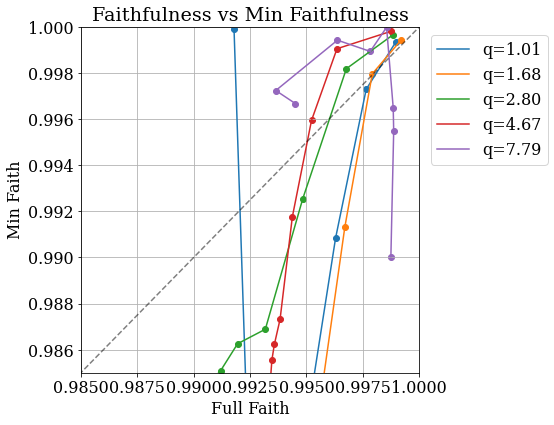

In [30]:
x = df["full_faith"]
xlabel="Full Faith"

y = df["Mc_min_faith"]
ylabel="Min Faith"

title="Faithfulness vs Min Faithfulness"

fig, ax1 = plt.subplots(figsize=(8,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.scatter(x[mask_q], y[mask_q])
    ax1.plot(x[mask_q], y[mask_q], label=f"q={q:.2f}")

xx = np.linspace(0, 1, 2)
ax1.plot(xx, xx, linestyle='--', color='k', alpha=0.5)

ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)

ax1.grid(which='both')
ax1.set_xlim(0.985, 1.0)
ax1.set_ylim(0.985, 1.0)

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.title(title)
plt.show()

# Studying the Inner Product instead of Faithfulness

The complete inner product here is calculated as:

$ \frac{(h_1 | h_2^*)}{\sqrt{h_1 | h_1^*} \sqrt{h_2 | h_2^*}} $,

where each inner product $(a|b)$ is calculated as:
$$ \int_{fmin}^{fmax} \frac{a(f) \cdot b(f)^*}{S_n(f)} df $$


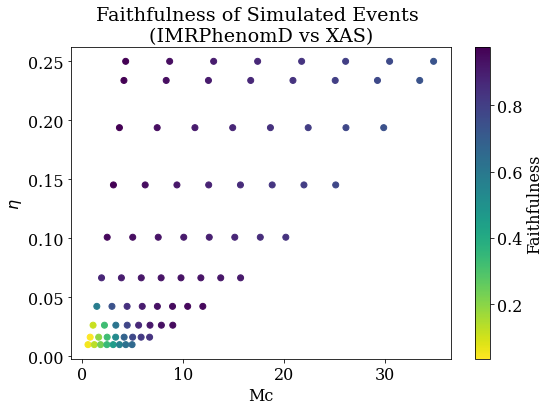

In [31]:
plot_bias_features(df["Mc"], df["eta"], df["full_inner_prod"], mtot=None, colormap="viridis_r", 
    title="Faithfulness of Simulated Events \n(IMRPhenomD vs XAS)", xlabel="Mc", ylabel="$\eta$", cbar_label="Faithfulness",  savefig='grid_faith_dist')



In [32]:
q_range = np.unique(np.round(df["q"], 3))

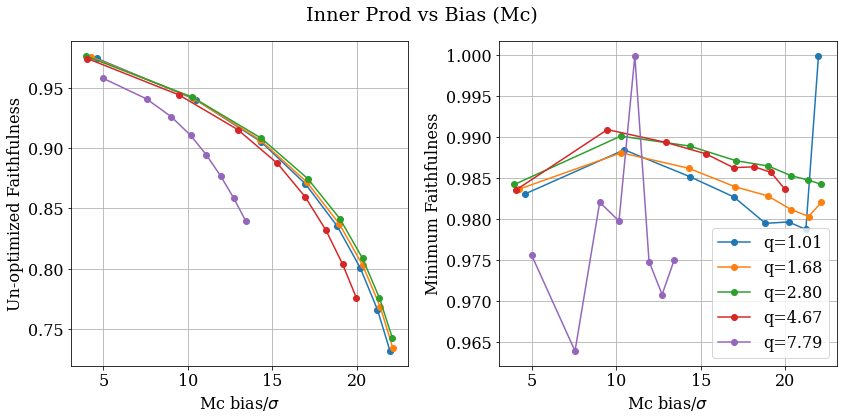

In [33]:
x = df["Mc_full_bias"]/df["Mc_stat_err"]
xlabel="Mc bias/$\sigma$"

y = df["full_inner_prod"]
ylabel="Un-optimized Faithfulness"

y1 = df["Mc_min_inner_prod"]
ylabel1="Minimum Faithfulness"

vmin = np.min(df["full_inner_prod"])
vmax = np.max(df["full_inner_prod"])

title="Inner Prod vs Bias (Mc)"
    
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.plot(x[mask_q], y[mask_q], '-o', label=f"q={q:.2f}")

    ax2.plot(x[mask_q], y1[mask_q], '-o', label=f"q={q:.2f}")

ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.grid(which='both')
# ax1.set_ylim(vmin, vmax)

ax2.set_xlabel(xlabel)
ax2.set_ylabel(ylabel1)
ax2.grid(which='both')
# ax2.set_ylim(vmin, vmax)

# plt.semilogx()
plt.legend(loc='lower right', ncol=1)
plt.suptitle(title)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# plt.savefig(plotdir+'inner_prod_requirements.pdf')
plt.show()

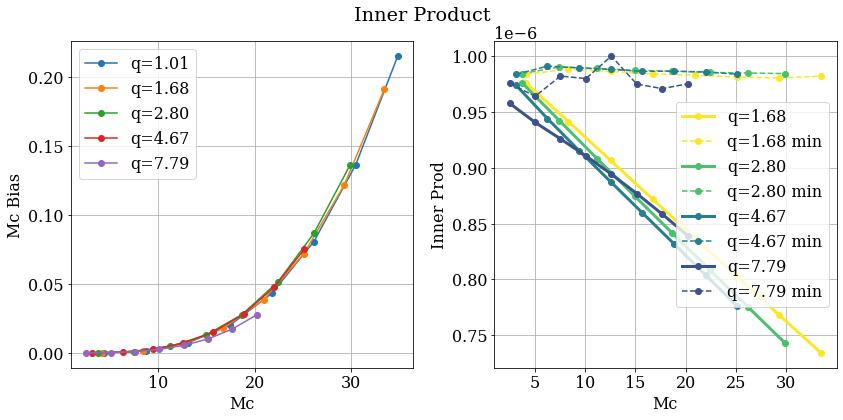

In [34]:
x1 = df["Mc"]
xlabel1="Mc"

x2 = df["inspiral_t"]
xlabel2="Inspiral Time (s)"

y = df["Mc_full_bias"]
ylabel="Mc Bias"

title="Max Lambda for unbiased Mc"


fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.plot(x1[mask_q], y[mask_q], '-o', label=f"q={q:.2f}")

    
ax1.set_xlabel(xlabel1)
ax1.set_ylabel(ylabel)
ax1.grid(which='both')
ax1.legend()


x1 = df["Mc"]
xlabel1="Mc"

y1 = df["full_inner_prod"]
ylabel1="Inner Prod"

y2 = df["Mc_min_inner_prod"]
ylabel2="Min Inner Prod"

y1 = y1/1e6
y2 = y2/1e6

title="Inner Product"
    

for i, q in enumerate(q_range[1:5]):
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax2.plot(x1[mask_q], y1[mask_q], '-o', lw=3, label=f"q={q:.2f}", color=plt.cm.viridis(2/q))
    ax2.plot(x1[mask_q], y2[mask_q], '--o', label=f"q={q:.2f} min", color=plt.cm.viridis(2/q))

    
ax2.set_xlabel(xlabel1)
ax2.set_ylabel(ylabel1)
ax2.grid(which='both')
ax2.legend()
# ax2.set_xscale('log')


plt.tight_layout()
plt.suptitle(title)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


It appears that the inner product (unoptimized faithfulness) behaves as expected. The inner product required to bring bias below 1 sigma is always higher than the base inner product b/w IMRPhenomD and XAS.

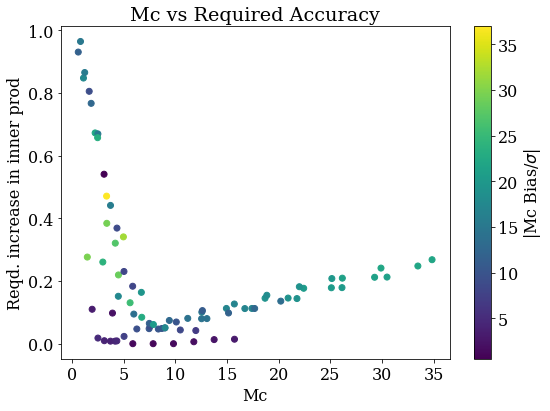

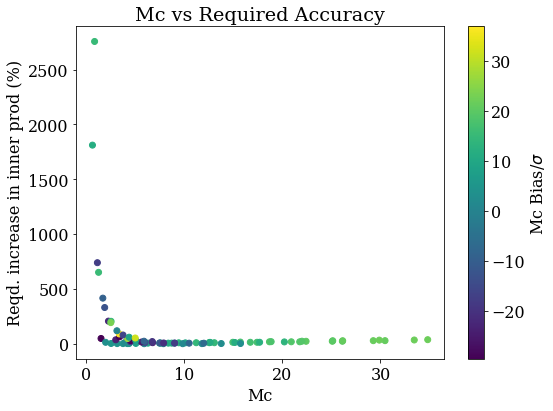

In [35]:
delta_inner_prod = (df["Mc_min_inner_prod"]-df["full_inner_prod"])

plot_bias_features(df["Mc"], delta_inner_prod, np.abs(df["Mc_full_bias"]/df["Mc_stat_err"]), mtot=None, colormap="viridis", 
    title="Mc vs Required Accuracy", xlabel="Mc", ylabel="Reqd. increase in inner prod", cbar_label="|Mc Bias/$\sigma$|", plt_show=False)


delta_inner_prod_perc = 100*(df["Mc_min_inner_prod"]-df["full_inner_prod"])/df["full_inner_prod"]

plot_bias_features(df["Mc"], delta_inner_prod_perc, df["Mc_full_bias"]/df["Mc_stat_err"], mtot=None, colormap="viridis", 
    title="Mc vs Required Accuracy", xlabel="Mc", ylabel="Reqd. increase in inner prod (%)", cbar_label="Mc Bias/$\sigma$", plt_show=False)

The above plot shows that the percentage increase in inner product required to bring the bias below 1 sigma increases with the bias. Also, it is ALWAYS positive, i.e. the required waveform is indeed closer to the true waveform.

# Grid Plots

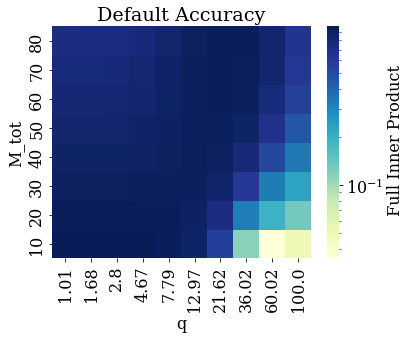

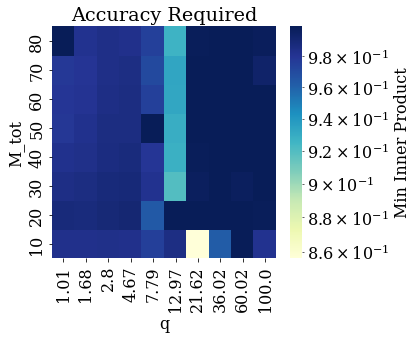

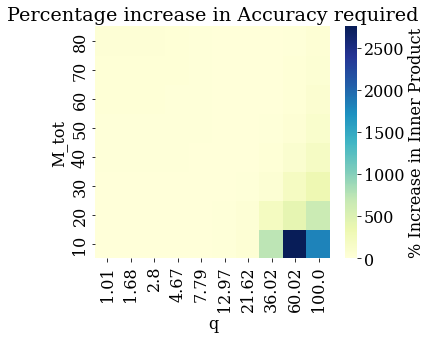

In [36]:
q_range = np.unique(np.round(df["q"], 2))
full_inner_prod_grid = np.zeros((len(mtots),len(q_range)))

vmin = np.min(df["Mc_min_inner_prod"])
vmax = np.max(df["Mc_min_inner_prod"])

z = df["z"].iloc[0]
for i, mtot in enumerate(mtots):
    mask_mtot = (df["M_tot"]< 1.01*mtot) * (df["M_tot"]>0.99*mtot)
    df_mtot = df[mask_mtot]
    for j, q in enumerate(q_range):
        mask_q = (df_mtot["q"]< 1.01*q) * (df_mtot["q"]>0.99*q)
        full_inner_prod_grid[i,j] = np.average(df_mtot[mask_q]["full_inner_prod"])

f, ax= plt.subplots(1, 1,  figsize=(6,5)) 

ax = sns.heatmap(full_inner_prod_grid, cmap="YlGnBu", vmin=vmin, vmax=vmax, norm=LogNorm(), linewidth=0, xticklabels=q_range, yticklabels=mtots, \
                cbar_kws={'label': ' Full Inner Product'})

plt.xlabel("q", fontsize=16)
plt.ylabel('M_tot', fontsize=16)

plt.gca().invert_yaxis()
plt.title("Default Accuracy")
plt.tight_layout()
# plt.savefig(plotdir+'inner_prod_default_grid.pdf')

plt.show()



q_range = np.unique(np.round(df["q"], 2))
min_inner_prod_grid = np.zeros((len(mtots),len(q_range)))

z = df["z"].iloc[0]
for i, mtot in enumerate(mtots):
    mask_mtot = (df["M_tot"]< 1.01*mtot) * (df["M_tot"]>0.99*mtot)
    df_mtot = df[mask_mtot]
    for j, q in enumerate(q_range):
        mask_q = (df_mtot["q"]< 1.01*q) * (df_mtot["q"]>0.99*q)
        min_inner_prod_grid[i,j] = np.average(df_mtot[mask_q]["Mc_min_inner_prod"])

f, ax= plt.subplots(1, 1,  figsize=(6,5)) 

ax = sns.heatmap(min_inner_prod_grid, cmap="YlGnBu", vmin=vmin, vmax=vmax, norm=LogNorm(), linewidth=0,xticklabels=q_range, yticklabels=mtots, \
                cbar_kws={'label': 'Min Inner Product'})

plt.xlabel("q", fontsize=16)
plt.ylabel('M_tot', fontsize=16)

plt.gca().invert_yaxis()
plt.title("Accuracy Required")
plt.tight_layout()
# plt.savefig(plotdir+'inner_prod_required_grid.pdf')
plt.show()


q_range = np.unique(np.round(df["q"], 2))
inner_prod_delta_grid = np.zeros((len(mtots),len(q_range)))

z = df["z"].iloc[0]
inner_prod_delta = 100*(df["Mc_min_inner_prod"]-df["full_inner_prod"])/df["full_inner_prod"]

for i, mtot in enumerate(mtots):
    mask_mtot = (df["M_tot"]< 1.01*mtot) * (df["M_tot"]>0.99*mtot)
    df_mtot = df[mask_mtot]
    for j, q in enumerate(q_range):
        mask_q = (df_mtot["q"]< 1.01*q) * (df_mtot["q"]>0.99*q)
        inner_prod_delta_grid[i,j] = np.average(inner_prod_delta[mask_mtot][mask_q])


f, ax= plt.subplots(1, 1,  figsize=(6,5)) 

ax = sns.heatmap(inner_prod_delta_grid, cmap="YlGnBu", linewidth=0, xticklabels=q_range, yticklabels=mtots, \
                cbar_kws={'label': '% Increase in Inner Product'})

plt.xlabel("q", fontsize=16)
plt.ylabel('M_tot', fontsize=16)

plt.gca().invert_yaxis()
plt.title("Percentage increase in Accuracy required")
plt.tight_layout()
# plt.savefig(plotdir+'percentage_inner_prod_required_grid.pdf')

plt.show()


